In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

The idea of  logistic regression is to use the sigmoid function which is:
$$sigmoid(z) = \frac{1}{1+e^{-z}}$$

Since the range of the $sigmoid(z)$ is only $(0,1)$ which is the best to describe for probability

Just like the linear regression function, we have:
$$ln\left(\frac{p_{(x)}}{1-p_{(x)}}\right) = <w,x> + b$$
We have a function like this because $ln\left(\frac{p_{(x)}}{1-p_{(x)}}\right)$ will range from $(- infinity, + infinity)$. Also, this $p(x)$ will be our predicted $y$
$$=> y^P = \displaystyle\frac{1}{1+e^{-\left(<w,x> + b\right)}}$$
To calculate the lost function like the square residuals function in linear regression, we have the cross entropy function in order to calculate the difference between two probability distributions $y$ and $y^P$
$$ J = - \displaystyle\Sigma_{i = 1}^{m} \left(y_i * ln(y^P_i)  + (1 - y_i) (1 -ln(y^P_i)) \right)$$

\begin{equation*}
=>
    \begin{cases}
        \frac{\delta J}{\delta w} &= X_{n*m} * (y^P - y)_{m*1} * \frac{1}{m} \\ 
        \frac{\delta J}{\delta b} &=\frac{1}{m}\Sigma_{i = 1}^{m}(y^P_i - y_i)
    \end{cases}
\end{equation*}

We will try to minimize the $J(w,b)$

In [69]:
class LogisticRegressionTest:
    def __init__(self, X, y, n_iters = 1000, alpha = 0.001):
        self.n_iters = n_iters
        self.W = None
        self.b = 0
        self.n = None
        self.m = None
        self.alpha = alpha
        self.y = np.array(y)
        self.X = np.array(X)
        self.y_pred = None

    def updatecoff(self):
        # Compute predicted probabilities
        self.y_pred = np.array([self.sigmoid(np.dot(self.W, self.X[i]) + self.b) for i in range(self.m)])
        # Compute gradients
        differences = self.y_pred - self.y
        b_delta = np.sum(differences) / self.m
        w_delta = np.dot(self.X.T, differences) / self.m

        # Update weights and bias
        self.b -= self.alpha * b_delta
        self.W -= self.alpha * w_delta
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def lossfunction(self):
        loss = -np.sum([self.y[i] * np.log(self.y_pred[i]) + (1-self.y[i]) * (1-np.log(self.y_pred[i])) for i in range(self.m)])
        return loss

    def fit(self):
        self.m, self.n = self.X.shape
        self.W = np.zeros(self.n)
        loss = float('inf')
        print(self.y.shape)
        for _ in range(self.n_iters):
            self.updatecoff()
            new_loss = self.lossfunction()
            if new_loss >= loss:
                break

    def predict( self, X ) :     
        Z = 1/(1 + np.exp( - (X.dot(self.W) + self.b)))         
        Y = np.where(Z > 0.5, 1, 0)         
        return Y

In [8]:
df = pd.read_csv('./data.csv')
df = df.drop(['id', 'Unnamed: 32'], axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


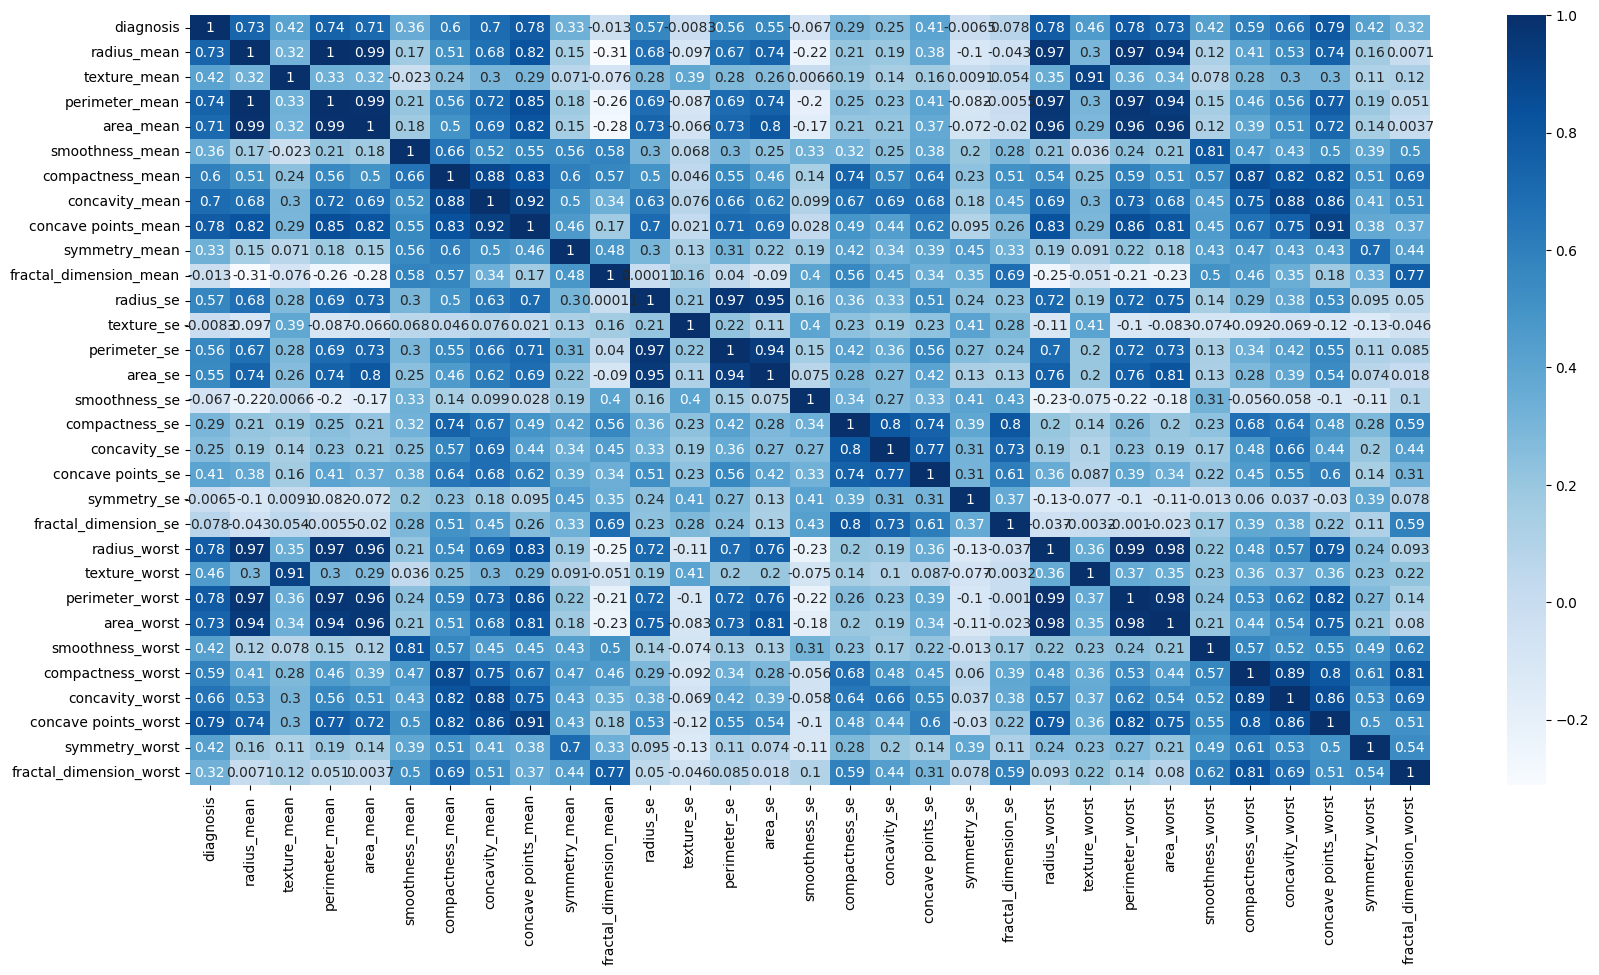

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True, cmap='Blues')
plt.show()

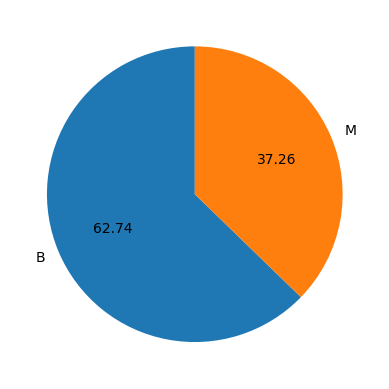

In [22]:
diagnosis = df['diagnosis'].value_counts(normalize=True)
plt.pie(x = diagnosis.values, labels = ['B', 'M'], startangle=90, autopct='%.2f')
plt.show()

In [70]:
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lgr = LogisticRegressionTest(X_train, y_train)
lgr.fit()

(455,)


C:\Users\admin\AppData\Local\Temp\ipykernel_7124\3407987730.py:26: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
C:\Users\admin\AppData\Local\Temp\ipykernel_7124\3407987730.py:29: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum([self.y[i] * np.log(self.y_pred[i]) + (1-self.y[i]) * (1-np.log(self.y_pred[i])) for i in range(self.m)])
C:\Users\admin\AppData\Local\Temp\ipykernel_7124\3407987730.py:29: RuntimeWarning: invalid value encountered in scalar multiply
  loss = -np.sum([self.y[i] * np.log(self.y_pred[i]) + (1-self.y[i]) * (1-np.log(self.y_pred[i])) for i in range(self.m)])


In [72]:
lgr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0])

In [73]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr.predict(X_test)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0])